In [1]:
from mpl_toolkits.mplot3d import Axes3D #For Basic ploting
from sklearn.preprocessing import StandardScaler #Preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
# Preprocessing
from sklearn.naive_bayes import GaussianNB #import gaussian naivebayes model
from sklearn.tree import DecisionTreeClassifier #import Decision treeclassifier
from sklearn import metrics #Import scikit-learn metrics module foraccuracy calculation
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")


In [2]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [3]:
from sklearn.metrics import classification_report,confusion_matrix 
import itertools
def plot_cm(cm,classes,normalize=False,title='confusion matrix',cmap = plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print('n cm')
    else:
        print('cm w n')
    print(cm)
    plt.imshow(cm, interpolation ='nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [4]:
nRowsRead = 1000 # specify No. of row. 'None' for whole data
# test_mosaic.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('train_mosaic.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'train_mosaic.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 78 columns


In [5]:
df1.head()

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
0,80,101168794,20,1,969,0,353,0,48.450000,119.083551,...,0.0,739228.5,743103.4661,1264682.0,213775.0,49700000.0,41400000.0,79000000.0,20500000.0,DoS Hulk
1,60711,58,1,1,0,0,0,0,0.000000,0.000000,...,32.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,53,31146,4,2,148,244,37,37,37.000000,0.000000,...,20.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,80,254704,3,4,429,389,423,0,143.000000,242.505670,...,20.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,443,11932077,12,16,5030,15703,1525,0,419.166667,644.896586,...,20.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [6]:
df1.dtypes


Destination_Port                 int64
Flow_Duration                    int64
Total_Fwd_Packets                int64
Total_Backward_Packets           int64
Total_Length_of_Fwd_Packets      int64
                                ...   
Idle_Mean                      float64
Idle_Std                       float64
Idle_Max                       float64
Idle_Min                       float64
Label                           object
Length: 78, dtype: object

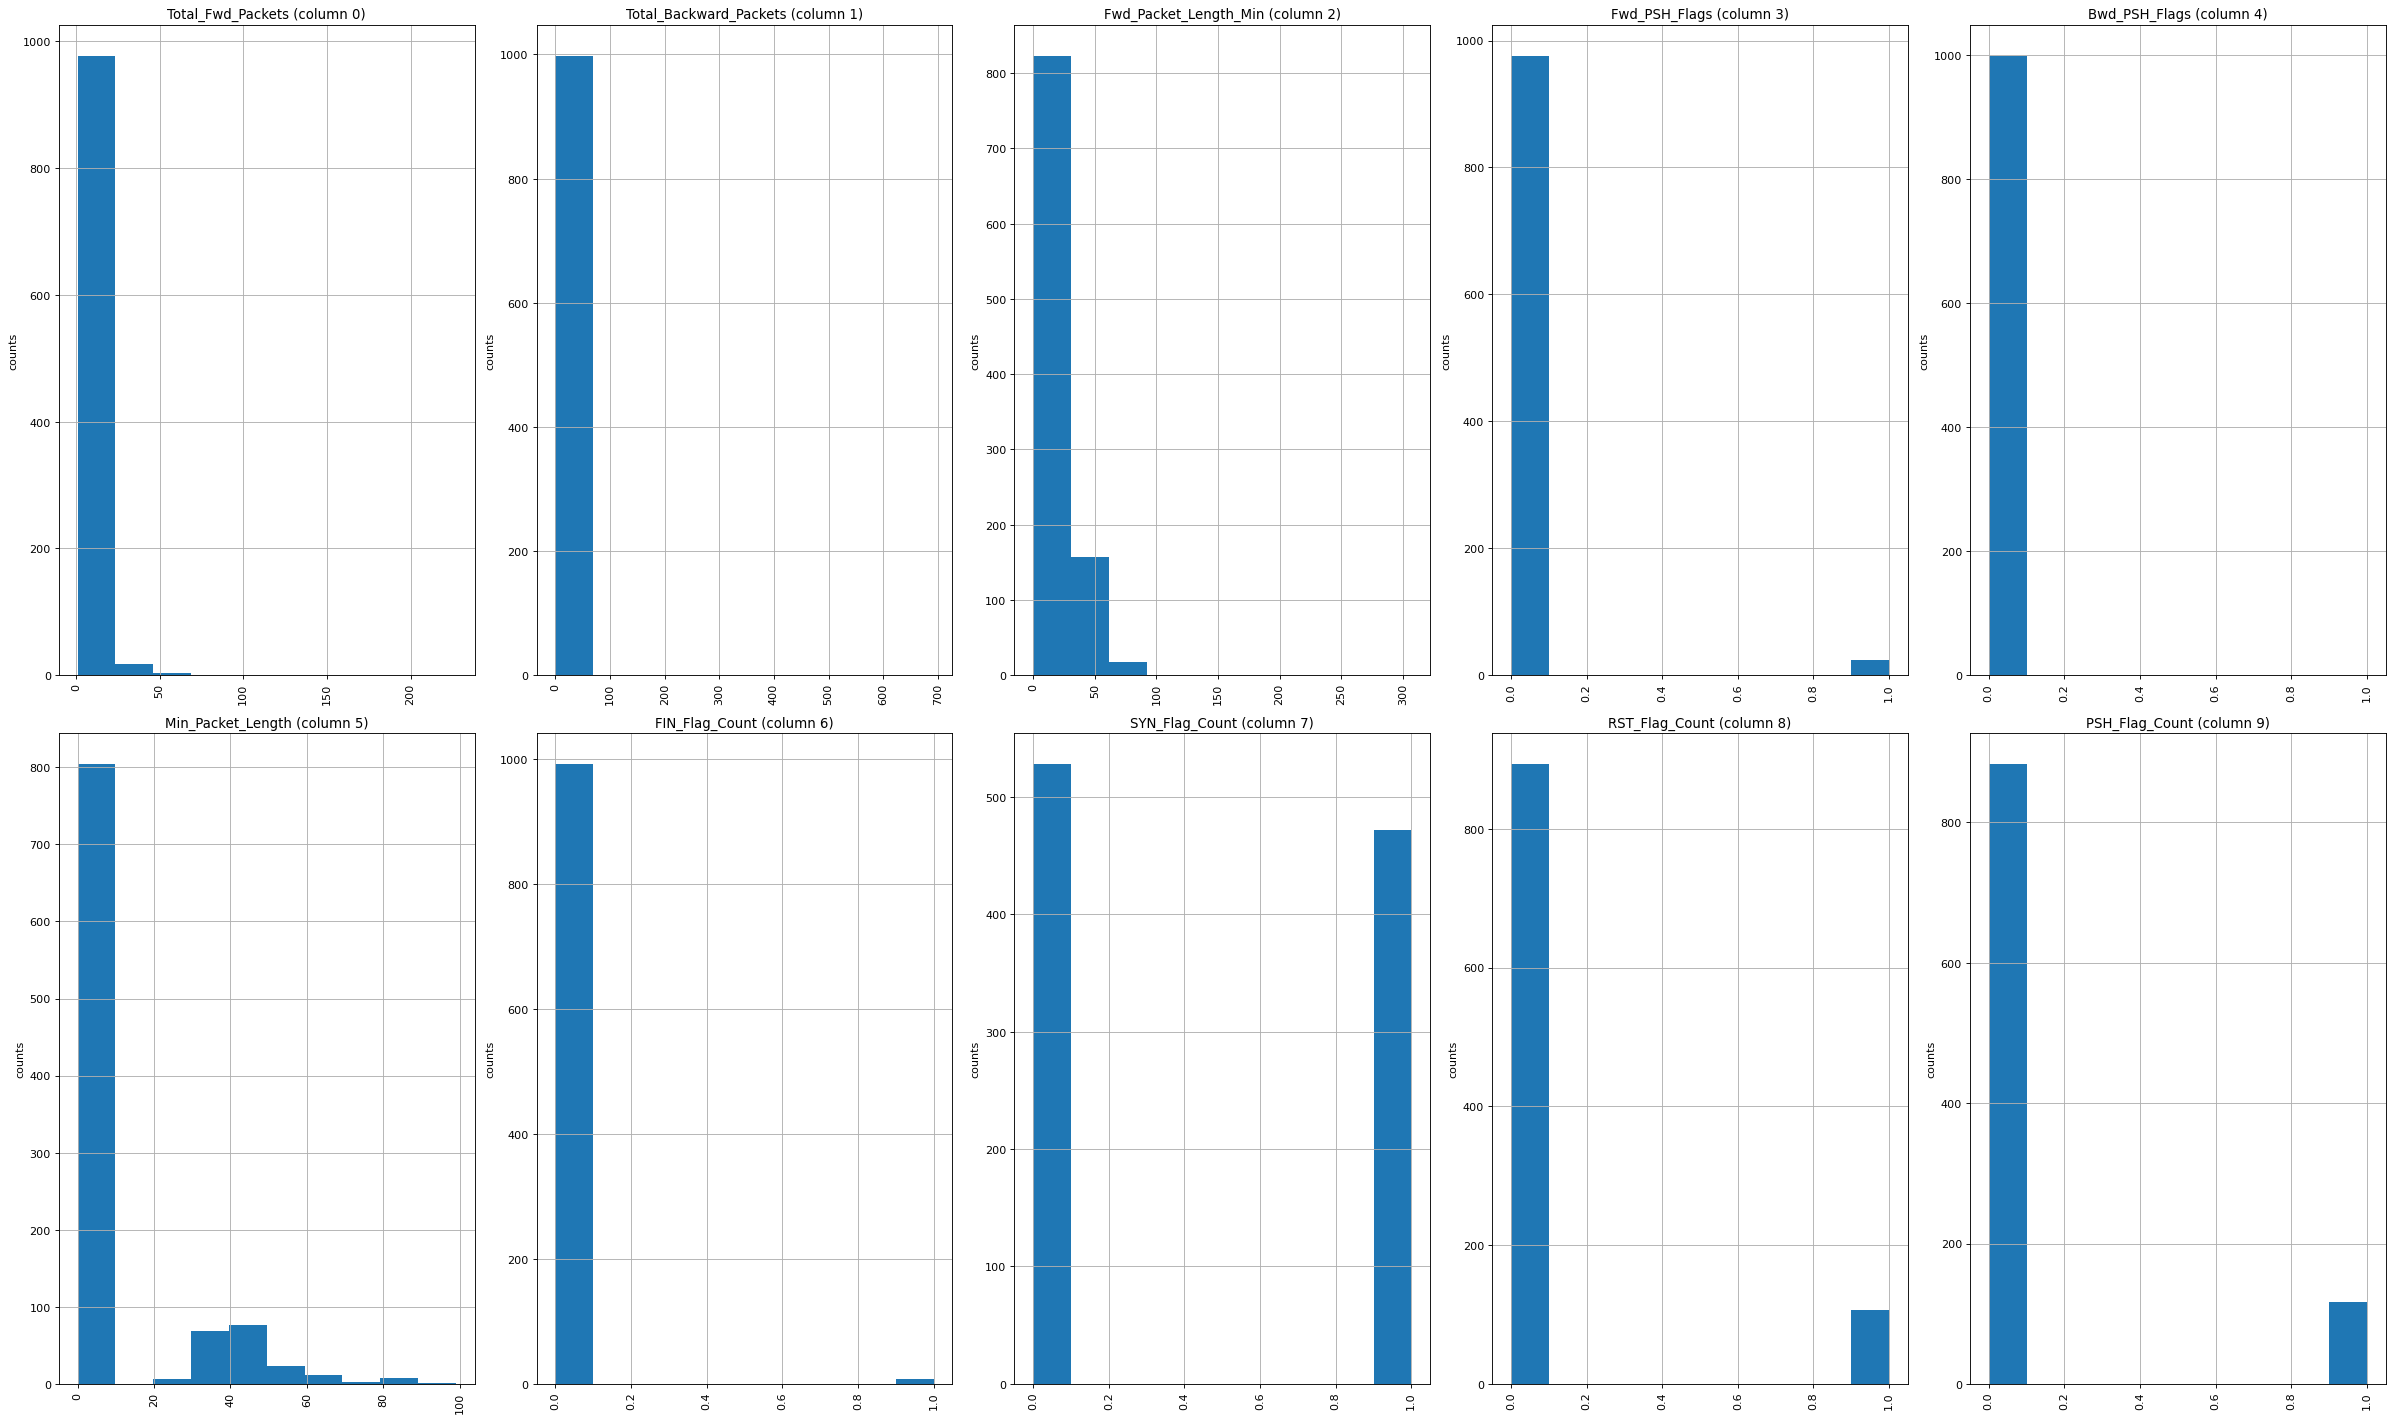

In [7]:
plotPerColumnDistribution(df1,10,5)

In [8]:
nRowsRead = None # specify No. of rows. 'None' for whole file
# train_mosaic.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df2 = pd.read_csv('test_mosaic.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = 'test_mosaic.csv'

In [9]:
df2.head()

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
0,53,87750,2,2,72,264,36,36,36.000000,0.000000,...,32.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,BENIGN
1,53,31073,4,4,120,232,30,30,30.000000,0.000000,...,32.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,BENIGN
2,80,41125329,8,1,387,0,188,0,48.375000,80.505435,...,0.0,1218262.0,0.0,1218262.0,1218262.0,37178044.0,0.00,37178044.0,37178044.0,DoS slowloris
3,53,40633,4,4,140,508,35,35,35.000000,0.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,BENIGN
4,80,41920705,7,1,211,0,168,0,30.142857,61.300975,...,0.0,2611.0,0.0,2611.0,2611.0,19711185.0,2319322.97,21351194.0,18071176.0,DoS slowloris


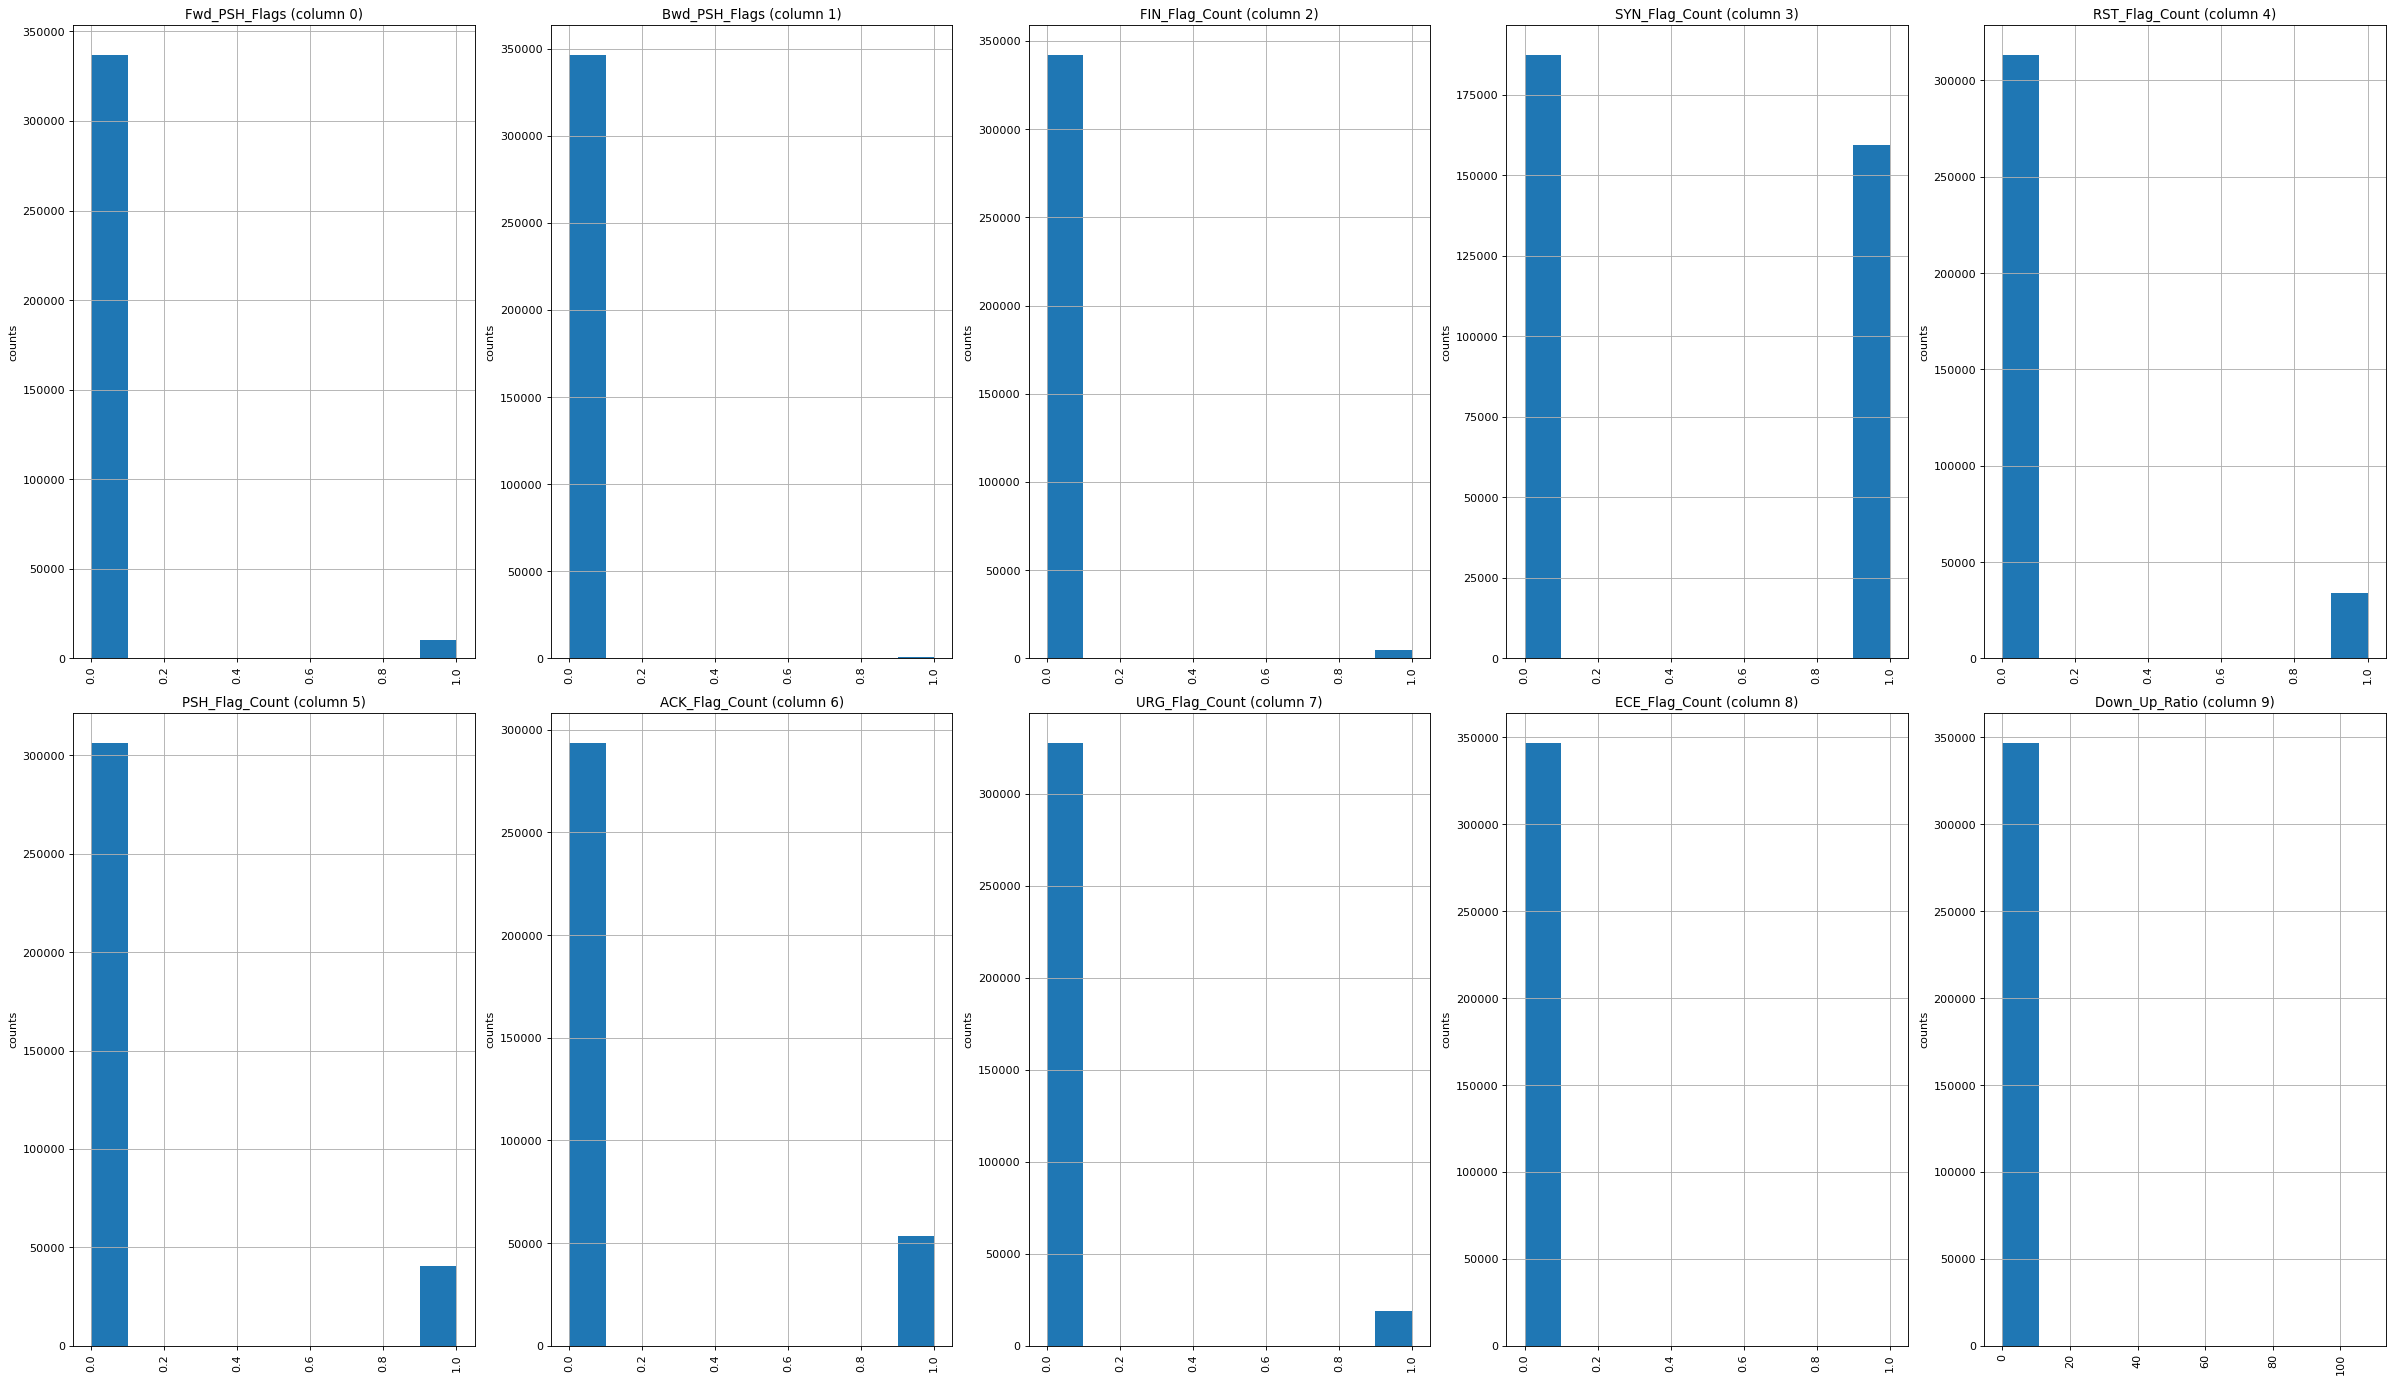

In [10]:
plotPerColumnDistribution(df2,10,5)

In [11]:
df = pd.concat([df1,df2])
df.shape

(347869, 78)

In [12]:
df.head()

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
0,80,101168794,20,1,969,0,353,0,48.450000,119.083551,...,0.0,739228.5,743103.4661,1264682.0,213775.0,49700000.0,41400000.0,79000000.0,20500000.0,DoS Hulk
1,60711,58,1,1,0,0,0,0,0.000000,0.000000,...,32.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,53,31146,4,2,148,244,37,37,37.000000,0.000000,...,20.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,80,254704,3,4,429,389,423,0,143.000000,242.505670,...,20.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,443,11932077,12,16,5030,15703,1525,0,419.166667,644.896586,...,20.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [13]:
X = df.drop('Label', axis=1)
y = df['Label']

In [14]:
scaler=MinMaxScaler((-1,1))

In [15]:
from imblearn.under_sampling import RandomUnderSampler
rus=RandomUnderSampler()
x_rus, y_rus = rus.fit_resample(X, y)
x=scaler.fit_transform(x_rus)
y = y_rus

In [16]:
x

array([[-0.9864803 , -0.99999993, -0.99999047, ..., -1.        ,
        -1.        , -1.        ],
       [-0.99838252, -0.99948698, -0.99999047, ..., -1.        ,
        -1.        , -1.        ],
       [ 0.50541704, -0.99999993, -0.99999047, ..., -1.        ,
        -1.        , -1.        ],
       ...,
       [-0.99755852,  0.09034177, -0.99991425, ..., -0.87398539,
        -0.58832318, -0.74925488],
       [-0.99755852,  0.0554541 , -0.99991425, ..., -0.95866782,
        -0.6328046 , -0.6826287 ],
       [-0.99755852, -0.52094501, -0.99996189, ..., -1.        ,
        -0.52436658, -0.52436658]])

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [18]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [19]:
print("Accuracy",metrics.accuracy_score(y_test,y_pred))

Accuracy 0.9997289238275956


In [20]:
clf = svm.SVC(kernel='linear') # Linear Kernel
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [21]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9965362489081654


In [22]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [23]:
rf1 = RandomForestClassifier(n_estimators=100)
dt1 = DecisionTreeClassifier()
svm1 = svm.SVC(kernel = 'linear')

In [24]:
from sklearn. ensemble import VotingClassifier
evc = VotingClassifier( estimators= [('rf1',rf1),('dt1',dt1),('svm1',svm1)],verbose=True)

In [25]:
evc.fit(pd.DataFrame(X_train).iloc[1:],pd.DataFrame(y_train).iloc[1:])

[Voting] ...................... (1 of 3) Processing rf1, total=  20.4s
[Voting] ...................... (2 of 3) Processing dt1, total=   2.6s
[Voting] ..................... (3 of 3) Processing svm1, total= 1.6min


VotingClassifier(estimators=[('rf1', RandomForestClassifier()),
                             ('dt1', DecisionTreeClassifier()),
                             ('svm1', SVC(kernel='linear'))],
                 verbose=True)

In [26]:
print("Accuracy is {}".format(evc.score(X_test, y_test)))

Accuracy is 0.9998192825517304
